
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>
    Niloufar Abbasi

____

# Emotion Recognition with Recurrent Neural Networks


---

## **Introduction**

In this task, you will implement a Recurrent Neural Network (RNN) to perform tweet emotion recognition. The goal is to classify tweets into one of six basic emotions:
- **0: sadness**
- **1: joy**
- **2: love**
- **3: anger**
- **4: fear**
- **5: surprise**

We will be using a dataset of tweets, where each tweet has been labeled with one of these emotions. Throughout this notebook, you will follow step-by-step instructions to build and train your model. As you progress, you'll complete the provided TODO sections by filling in the necessary code and functions.

By the end of this exercise, you will:
- Understand how to preprocess text data for use in RNN models.
- Build and train a model using Pytorch.
- Evaluate the performance of your model on the test set.

---


---

## Task 1: Enter Your Information

Before we begin, please enter your **student ID** and **name** in the code section below.

Make sure to replace the placeholders with your actual information.

---

In [1]:
#########################################
# TODO: Enter your personal information #
#########################################

student_name = 'Tina Halimi'  # Replace with your name
student_id   = 400101078  # Replace with your student ID

print("Your name:", student_name)
print("Your student ID:", student_id)

Your name: Tina Halimi
Your student ID: 400101078


---

## Task 2: Setup and Imports

In this task, we'll be preparing our environment by importing the necessary libraries. Please run the cells below to set everything up. If any library is missing on your end, make sure to install it.

### Instructions:
1. **Run the cells** to install any required packages and import the necessary libraries.
2. If any library is not installed in your environment, use `!pip install <library_name>` to install it.
---

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Required Libraries:

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datasets import load_dataset

%matplotlib inline

#####################################################################
# TODO: Add any additional libraries you may need for your analysis #
#####################################################################

# You can add your libraries here
from transformers import AutoTokenizer
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

### Additional Functions

The following functions have been provided to help you visualize the results of your model training. These will allow you to analyze both the model's performance over time (through the training history) and how well it performs on individual predictions (through a confusion matrix).

1. **`plot_history(hist)`**: This function takes the training history object (`hist`) from your model and plots both the accuracy and loss over the number of epochs for both training and validation sets. It provides an easy way to visually track the model's learning progress and performance.

2. **`visualize_confusion_matrix(actual_labels, predicted_labels, classes)`**: After making predictions with your model, you can use this function to plot a confusion matrix. It shows the accuracy of your model across each class, helping to identify areas where the model is performing well and where it might be struggling. The matrix is normalized to make comparisons easier.

These functions are for your convenience, you can directly use them after running your model to visualize the results.


In [4]:
# Functions to visualize training history and confusion matrix
def plot_history(hist):
    epochs = len(hist.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs), hist.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs), hist.history.get('loss'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_confusion_matrix(actual_labels, predicted_labels, classes):

    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


---

## Task 3: Importing Data

In this task, we will

- import the Tweet Emotion dataset

- create training, validation, and test sets
    
- extract the tweets and their corresponding labels for further analysis

---

In [5]:
dataset = load_dataset('emotion')
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [7]:
# Display the first few samples
print(dataset['train'][0:5])  # Adjust 'train' to 'test' or other splits if necessary

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [8]:
###########################################################################
# TODO: Create variables for the training, validation, and test datasets. #
###########################################################################
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']


In [9]:
########################################################################################################
# TODO:                                                                                                #
# Implement the `extract_tweets_labels` function to iterate over the provided dataset.                 #
# Within this function, extract the tweet text and their corresponding labels into two separate lists. #
# Then, call this function with the training dataset to obtain the tweets and labels,                  #
# ensuring proper data handling for subsequent analysis.                                               #
########################################################################################################

def extract_tweets_labels(data):
    # Extract the text and labels from the data
    tweets = data['text']
    labels = data['label']
    return tweets, labels

# Get the tweets and labels from the training set
tweets_train, labels_train = extract_tweets_labels(train_data)
tweets_val, labels_val = extract_tweets_labels(validation_data)
tweets_test, labels_test = extract_tweets_labels(test_data)

# Display a sample
print(tweets_train[0], labels_train[0])


i didnt feel humiliated 0


---

## Task 4: Tokenization of Tweets

In this section, we will focus on the tokenization of the tweets in the dataset. Tokenization is a crucial step in natural language processing (NLP) that involves breaking down text into smaller units, such as words or subwords. This process enables the model to better understand and analyze the text data.

### Objectives:
1. Implement a tokenizer to convert the tweet texts into tokens.
2. Ensure the tokenization process handles various aspects of the text, such as punctuation and special characters.

By the end of this task, you will have a set of tokenized tweets ready for further processing in your NLP pipeline.

---

In [10]:
###############################################################################################################################################
# TODO: Tokenization of Tweets                                                                                                                #
# 1. Select a Tokenization Method: Choose a suitable tokenization method to preprocess the tweets.                                            #
# Ensure that the tokenization handles special characters and maintains the integrity of the text data.                                       #
# 2. Implement the Tokenizer: Once you have selected a method, implement the tokenizer to convert the tweet texts into sequences of tokens.   #
# 3. Test the Tokenization:                                                                                                                   #
# Verify the functionality of your tokenizer by applying it to a sample tweet from the dataset and displaying the resulting tokenized output. #
###############################################################################################################################################

# Load a pre-trained tokenizer (BERT)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_tweets(tweets):
    return [tokenizer.tokenize(tweet) for tweet in tweets]

# Tokenize a sample tweet
sample_tweet = tweets_train[0]
tokenized_sample = tokenize_tweets([sample_tweet])
print(sample_tweet)
print(tokenized_sample)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

i didnt feel humiliated
[['i', 'didn', '##t', 'feel', 'humiliated']]


---

## Task 5: Padding and Truncating Sequences

In this task, we will prepare the tokenized tweets for model training by checking their lengths and creating padded sequences.

1. **Checking the Length of the Tweets**
   - Analyze the distribution of tweet lengths to understand the range of token counts in the dataset.

2. **Creating Padded Sequences**
   - After tokenizing the tweets, sequences of different lengths must be adjusted to a uniform length to facilitate training.

---


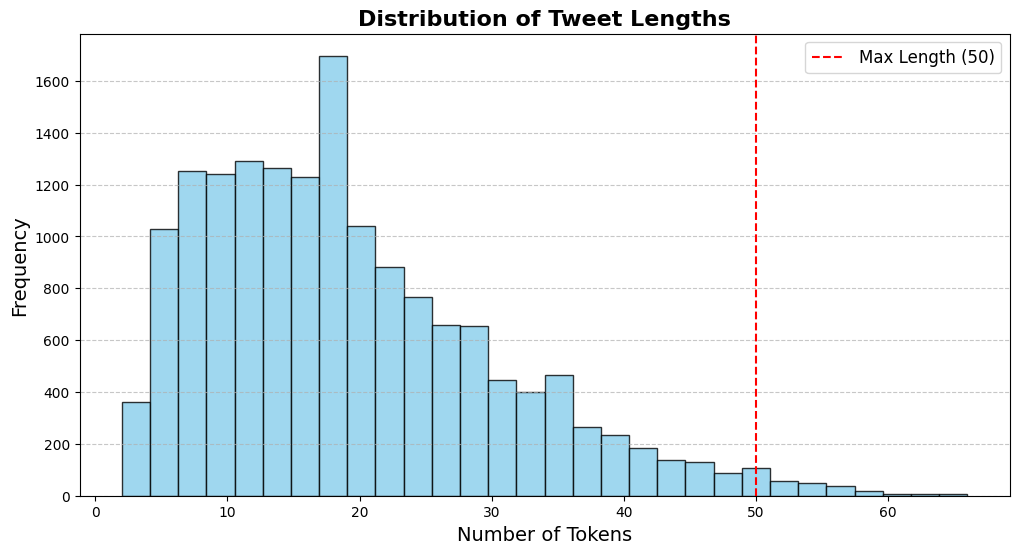

Selected max length for padding: 50


In [11]:
#####################################################################################################################################################
# TODO:                                                                                                                                             #
# Implement code to calculate the lengths of the tweets and visualize the distribution using a histogram. Use an appropriate visualization library. #
# After visualizing the distribution, determine a suitable maximum length for padding and truncating the sequences based on your findings.          #
#####################################################################################################################################################

# Calculate the lengths of the tweets
tweet_lengths = [len(tweet.split()) for tweet in tweets_train]

plt.figure(figsize=(12, 6))
plt.hist(tweet_lengths, bins=30, color='skyblue', alpha=0.8, edgecolor='black')
plt.axvline(x=50, color='red', linestyle='--', label='Max Length (50)')

plt.title("Distribution of Tweet Lengths", fontsize=16, fontweight='bold')
plt.xlabel("Number of Tokens", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

max_length = 50  # Set based on the histogram
print(f"Selected max length for padding: {max_length}")



In [12]:
############################################################################################################
# TODO: Define a function to convert the tokenized tweets into sequences and apply padding and truncation. #
# Use your determined maximum length for padding the sequences.                                            #
############################################################################################################

# def get_sequences(tokenizer, tweets):
#     sequences = ...
#     padded_sequences = ...
#     return padded_sequences

def get_sequences(tokenizer, tweets, max_length):

    # Tokenize the tweets and apply padding and truncation
    tokenized_data = tokenizer(
        tweets,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors="pt"    # Return sequences as PyTorch tensors
    )
    padded_sequences = tokenized_data['input_ids']  # Extract the padded input IDs
    return padded_sequences

padded_train_sequences = get_sequences(tokenizer, tweets_train, max_length)
print(padded_train_sequences[0])


tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


---

## Task 6: Analyzing Label Distribution

1. Checking the distribution of labels.
2. Addressing any class imbalance using appropriate techniques.

Note:

(**Providing a clear explanation of the chosen method to address the imbalance and how it will improve the model’s performance is critical.** Without handling class imbalance properly, the model could achieve a high accuracy by focusing on the majority class, but it may perform poorly on the minority class, which would result in misleading metrics and reduced generalization.

Hence, it is important to not only implement an appropriate solution but also **justify** why the selected approach is effective for the given task.)

---

<ipython-input-13-8c215e16d160>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')


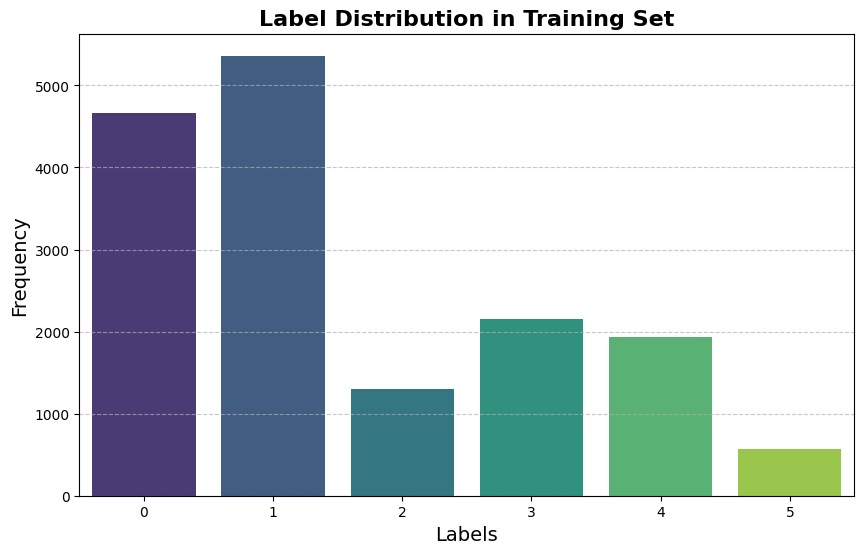

Label counts: Counter({1: 5362, 0: 4666, 3: 2159, 4: 1937, 2: 1304, 5: 572})


In [13]:
##########################################################################################################################
# TODO: Analyze the distribution of labels in the training set. (visualize it in a perfect way)                          #
# Determine if there is any class imbalance.                                                                             #
# If you observe any imbalance, apply one of the techniques you have learned throughout the course to address the issue. #
##########################################################################################################################


def analyze_label_distribution(labels):

    # Count each label
    label_counts = Counter(labels)

    # plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')
    plt.title("Label Distribution in Training Set", fontsize=16, fontweight='bold')
    plt.xlabel("Labels", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return label_counts

label_counts = analyze_label_distribution(labels_train)
print("Label counts:", label_counts)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
<ipython-input-13-8c215e16d160>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')


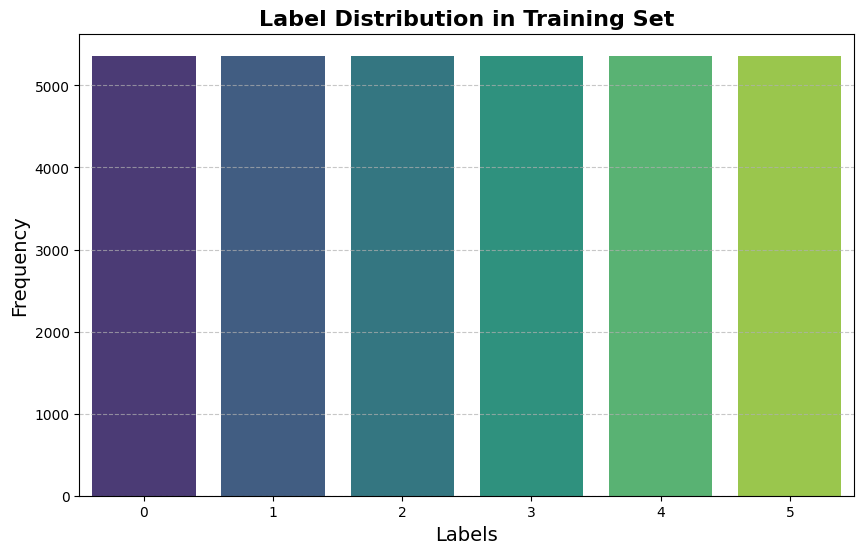

Label counts: [0 0 3 ... 5 5 5]


In [14]:
# oversampling for handling data imbalance
labels_array = np.array(labels_train)

oversampler = RandomOverSampler(random_state=42)
balanced_tweets, balanced_labels = oversampler.fit_resample(np.array(tweets_train).reshape(-1, 1), labels_array)

# Convert the resampled tweets back to a list
balanced_tweets = balanced_tweets.flatten()

label_counts_resample = analyze_label_distribution(balanced_labels)
print("Label counts:", balanced_labels)

### Explanation of the Selected Method to Handle Data Imbalance

#### **Understanding Class Imbalance**
Class imbalance was identified by analyzing the distribution of labels in the training dataset. Visualization and tools like `Counter` highlighted significant disparities in class frequencies, showing some labels with far fewer samples than others.

#### **Challenges Posed by Class Imbalance**
Class imbalance can lead to biased models that favor the majority class, causing:
- Overstated accuracy by predominantly predicting the majority class.
- Poor recall and F1-scores for minority classes, which are critical in tasks like sentiment analysis, where rare events (e.g., "anger" or "surprise") hold significant value.

#### **Method Applied: Random Oversampling**
To address this issue, **Random Oversampling** was used with the `RandomOverSampler` from the `imblearn` library. This method balances the dataset by duplicating samples in the minority classes until all classes have equal representation.

#### **Why Random Oversampling?**
- **Simple and Intuitive**: Balances the dataset by duplicating minority class samples without altering majority classes.
- **Data Integrity**: Retains the original data, avoiding synthetic sample generation.
- **Improved Representation**: Increases exposure to minority classes, enhancing model learning.
- **Fair Distribution**: Ensures all classes are equally represented, allowing the model to learn all patterns effectively.

#### **Impact on Model Performance**
- Reduces bias toward the majority class by balancing the training dataset.
- Improves metrics like **Precision**, **Recall**, and **F1-Score**, especially for minority classes.
- Enhances generalization, leading to better performance on unseen data.

#### Other Methods to Handle Class Imbalance
1. **Random Undersampling**: Reduces majority class samples but risks losing valuable data.
2. **SMOTE**: Generates synthetic minority samples to increase diversity.
3. **Class Weighting**: Assigns higher weights to minority classes to focus on them during training.
4. **Ensemble Methods**: Combines balanced subsets in ensemble models to reduce bias.
5. **Data Augmentation**: Expands minority classes by generating new or modified samples.

Each method offers unique advantages and can be selected based on the dataset and problem requirements.

---

## Task 7: Creating the Model

Design and implement a recurrent neural network for the task. You may utilize a sequential architecture like RNN or GRU to enhance the model's performance.

Build and compile your model using Pytorch.

**Once the model is created, summarize its structure to verify the design.**

---

In [15]:
#########################################################################################################
# TODO:                                                                                                 #
# Create a recurrent neural network model for the task.                                                 #
# (Suggestion: Implement a Bidirectional LSTM architecture to process the input sequences effectively.) #
# Once the model is created, summarize its structure to verify the design.                              #
#########################################################################################################

class BiLSTMModel(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, dropout=0.5):

        super(BiLSTMModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, bidirectional=True, batch_first=True)

        self.dropout = nn.Dropout(dropout)

        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):

        embedded = self.embedding(x)

        lstm_out, _ = self.lstm(embedded)

        lstm_out = lstm_out[:, -1, :]

        droped = self.dropout(lstm_out)

        out = self.fc(droped)

        return out

# Hyperparameters
vocab_size = tokenizer.vocab_size
embedding_dim = 128        # Size of word embeddings
hidden_dim = 256           # Number of hidden units
output_dim = 6             # Number of emotion classes (0-5)
num_layers = 2             # Number of LSTM layers
dropout = 0.5              # Dropout rate

model = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, dropout)

print(model)

BiLSTMModel(
  (embedding): Embedding(30522, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=6, bias=True)
)


The provided model summary represents a **Bidirectional LSTM (BiLSTM) Model** architecture, which is often used in natural language processing (NLP) tasks such as text classification, sentiment analysis, and sequence labeling. Here's a breakdown of its components:

1. **Embedding Layer**:
   - `Embedding(30522, 128)`
   - This layer maps input tokens (words or subwords) into dense vector representations of size 128.
   - The first value (`30522`) represents the vocabulary size, which is the number of unique tokens in the input data.
   - The second value (`128`) is the embedding dimension, which defines the size of each token's dense vector representation.

2. **LSTM Layer**:
   - `LSTM(128, 256, num_layers=2, batch_first=True, bidirectional=True)`
   - **Input Size (128)**: Matches the embedding dimension, indicating that the LSTM takes embeddings as input.
   - **Hidden Size (256)**: Each LSTM cell has 256 hidden units.
   - **num_layers=2**: The model stacks two LSTM layers, allowing for deeper learning of temporal dependencies.
   - **batch_first=True**: Ensures the input tensors are in the format `(batch_size, sequence_length, features)`.
   - **bidirectional=True**: The LSTM is bidirectional, meaning it processes the sequence both forwards and backwards, capturing contextual information from both directions.

3. **Dropout Layer**:
   - `Dropout(p=0.5)`
   - This layer helps prevent overfitting by randomly setting 50% (`p=0.5`) of the input values to zero during training.

4. **Fully Connected Layer**:
   - `Linear(in_features=512, out_features=6)`
   - **Input Features (512)**: The input size is double the LSTM's hidden size (256 × 2) because the LSTM is bidirectional.
   - **Output Features (6)**: The number of output features corresponds to the number of classes, indicating that this model performs classification with 6 categories.
   - **bias=True**: The layer includes a bias term.

### Overall Functionality
The model:
1. Transforms input text sequences into dense vector embeddings.
2. Processes the sequence using a bidirectional LSTM, capturing contextual dependencies in both directions.
3. Applies dropout for regularization to prevent overfitting.
4. Maps the learned representations to 6 class logits using the fully connected layer.

This architecture is well-suited for tasks like text classification or emotion analysis, leveraging both sequential data and bidirectional context.

---

## Task 8: Training the Model

In this task, you will prepare a validation set and train your model using the training data.

1. Prepare the validation set by extracting tweets and labels, and convert them into sequences using the tokenizer.
2. Train the model on the training data.
3. Ensure that you implement **Early Stopping** to prevent overfitting and enhance efficiency.

Make sure to monitor the validation accuracy during training and adjust the parameters as necessary.

---

In [16]:
###############################################################################################################
# TODO: Extract the tweets and labels from the validation set. Convert the tweets into sequences using the    #
#       tokenizer defined earlier. Prepare the data for validation and ensure it matches the format of the    #
#       training set.                                                                                         #
###############################################################################################################
# Your code for extracting and processing validation data goes here

# Tokenize and Pad
balanced_tweets = list(balanced_tweets.flatten())
balanced_tweets_padded = get_sequences(tokenizer, balanced_tweets, max_length)

padded_validation_sequences = get_sequences(tokenizer, tweets_val, max_length)

# Convert Labels to PyTorch Tensors
balanced_labels_tensor = torch.tensor(balanced_labels, dtype=torch.long)
validation_labels_tensor = torch.tensor(labels_val, dtype=torch.long)

# DataLoaders
batch_size = 32
train_dataset = TensorDataset(balanced_tweets_padded, balanced_labels_tensor)
val_dataset = TensorDataset(padded_validation_sequences, validation_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

###############################################################################################################
# TODO: Train the model on the prepared training data. Ensure you implement early stopping to monitor the     #
#       validation accuracy and prevent overfitting. Adjust the number of epochs or other hyperparameters as  #
#       needed to optimize model performance.                                                                 #
###############################################################################################################

# Your code for training the model with early stopping goes here

# Hyperparameters and Model
epochs = 20
learning_rate = 1e-3
patience = 5  # For early stopping

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# History dictionary to store metrics for visualization
history = {
    "loss": [],
    "val_loss": [],
    "accuracy": [],
    "val_accuracy": []
}

# early stopping variables
best_val_loss = float("inf")
early_stop_counter = 0

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_accuracy = correct_train / total_train
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == y_batch).sum().item()
            total_val += y_batch.size(0)

    val_accuracy = correct_val / total_val
    val_loss /= len(val_loader)

    # Save metrics to history
    history["loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["accuracy"].append(train_accuracy)
    history["val_accuracy"].append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.4f}, "
          f"Val Loss = {val_loss:.4f}, Val Accuracy = {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded for testing.")

Epoch 1/20: Train Loss = 1.7820, Train Accuracy = 0.1790, Val Loss = 1.8302, Val Accuracy = 0.0835
Epoch 2/20: Train Loss = 1.0959, Train Accuracy = 0.5408, Val Loss = 0.8963, Val Accuracy = 0.5960
Epoch 3/20: Train Loss = 0.3925, Train Accuracy = 0.8657, Val Loss = 0.5616, Val Accuracy = 0.8260
Epoch 4/20: Train Loss = 0.1658, Train Accuracy = 0.9511, Val Loss = 0.4972, Val Accuracy = 0.8590
Epoch 5/20: Train Loss = 0.0916, Train Accuracy = 0.9735, Val Loss = 0.5481, Val Accuracy = 0.8580
Epoch 6/20: Train Loss = 0.0561, Train Accuracy = 0.9836, Val Loss = 0.5939, Val Accuracy = 0.8565
Epoch 7/20: Train Loss = 0.0448, Train Accuracy = 0.9869, Val Loss = 0.6832, Val Accuracy = 0.8605
Epoch 8/20: Train Loss = 0.0421, Train Accuracy = 0.9873, Val Loss = 0.6597, Val Accuracy = 0.8615
Epoch 9/20: Train Loss = 0.0320, Train Accuracy = 0.9912, Val Loss = 0.6297, Val Accuracy = 0.8780
Early stopping triggered!
Best model loaded for testing.


<ipython-input-16-853f33dbb7ac>:116: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


---

## Task 9: Evaluating the Model

In this task, you will evaluate the performance of your model on the test set and visualize the training history. You will also analyze the model’s predictions on both individual and complete test samples.

### Steps:
1. Visualize the loss and accuracy over the training epochs.
2. Prepare and preprocess the test data using functions from Task 2.
3. Evaluate the model on the test set and examine individual predictions.
4. Analyze the overall predictions and display a confusion matrix.

---

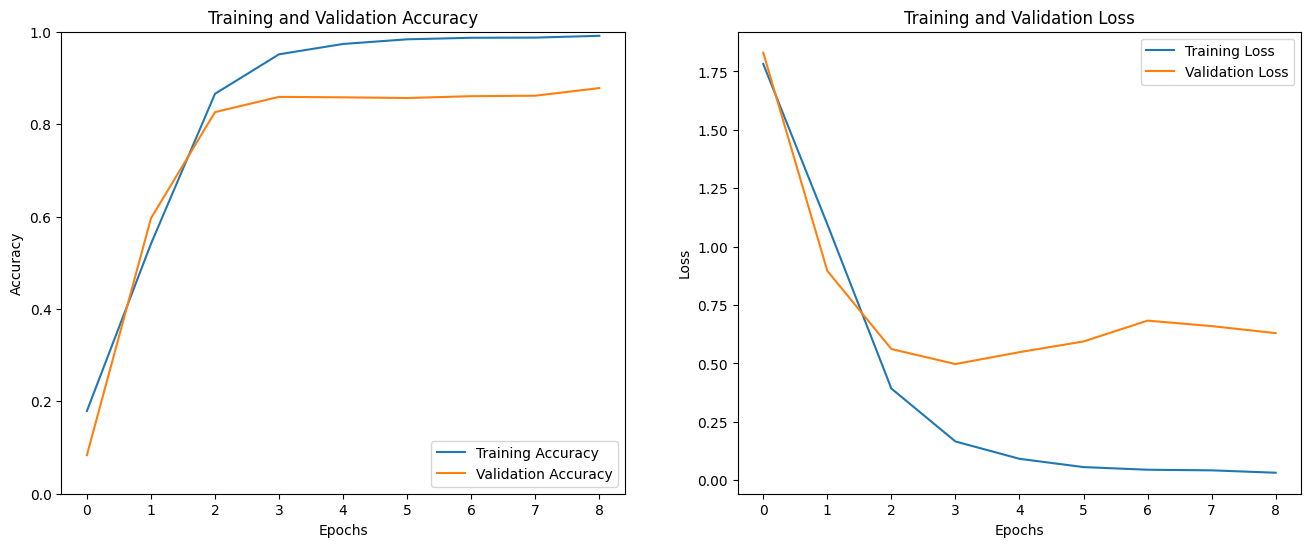

In [17]:
###############################################################################################################
# TODO: Visualize the training history by plotting the loss and accuracy over the epochs to assess model      #
#       performance. Use an appropriate visualization method to ensure clarity and effectiveness.             #
#       you can use function implemented in Task 2 for your visualizations                                    #
###############################################################################################################
# Your code for visualizing the training history goes here

def plot_history(hist):

    epochs = len(hist['loss'])
    plt.figure(figsize=(16, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs), hist.get('accuracy'), label='Training Accuracy')
    plt.plot(range(0, epochs), hist.get('val_accuracy'), label='Validation Accuracy')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs), hist.get('loss'), label='Training Loss')
    plt.plot(range(0, epochs), hist.get('val_loss'), label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [18]:
###############################################################################################################
# TODO: Prepare the test set by extracting the tweets and labels, then convert the tweets into sequences using #
#       the tokenizer. Ensure the format matches that of the training and validation sets.                     #
###############################################################################################################
# Your code for preparing the test set goes here

padded_test_sequences = get_sequences(tokenizer, tweets_test, max_length)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.long)

# Evaluate on test set
test_dataset = TensorDataset(padded_test_sequences, labels_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
###############################################################################################################
# TODO: Evaluate the model's performance on the test set. Print the accuracy and loss, and review individual   #
#       predictions to understand how the model is performing on unseen data.                                 #
###############################################################################################################
# Your code for evaluating the model and reviewing predictions goes here

# Evaluate model
model.eval()
test_loss = 0
correct = 0
total = 0
predicted_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Display 5 sample predictions
for i in range(5):
    tweet = tweets_test[i]
    true_label = labels_test[i]
    predicted_label = predicted_labels[i]
    print(f"Tweet: {tweet}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("---")

Test Loss: 0.5234, Test Accuracy: 0.8530
Tweet: im feeling rather rotten so im not very ambitious right now
True Label: 0, Predicted Label: 0
---
Tweet: im updating my blog because i feel shitty
True Label: 0, Predicted Label: 0
---
Tweet: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
True Label: 0, Predicted Label: 0
---
Tweet: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
True Label: 1, Predicted Label: 1
---
Tweet: i was feeling a little vain when i did this one
True Label: 0, Predicted Label: 0
---


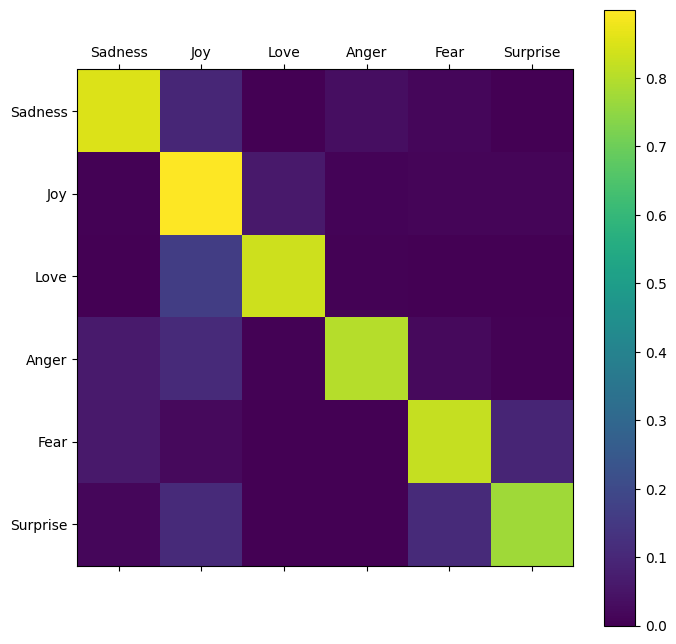

In [20]:
###############################################################################################################
# TODO: Generate predictions for all test samples and analyze the model's overall performance. Display the     #
#       confusion matrix to visualize the differences between true and predicted labels, helping to interpret  #
#       the model's classification results.                                                                   #
###############################################################################################################

# Your code for generating predictions and displaying the confusion matrix goes here

class_names = ["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"]
visualize_confusion_matrix(labels_test, predicted_labels, class_names)


# Final Analysis

After visualizing the confusion matrix based on your model’s predictions, analyze the results and provide insights into the model’s classification performance.

### **Question:**
<span style="font-size: 1.2em;">Which class seems to get confused with the class *love* the most?</span>

**Remember the class labels:**
- **0:** *Sadness*
- **1:** *Joy*
- **2:** *Love*
- **3:** *Anger*
- **4:** *Fear*
- **5:** *Surprise*

Reflect on the confusion matrix to answer this question and provide your reasoning for why this confusion might occur based on the emotional nature of the classes.


Analyzing the confusion matrix:

1. **Diagonal Dominance**: The matrix shows relatively high values along the diagonal, indicating that the model is performing well for most classes, as it correctly classifies a significant number of samples for each class.

2. **Off-Diagonal Confusion**: The off-diagonal values represent misclassifications between different emotion classes. For the class *Love* (row/column labeled "Love"), there is a notable value in the "Joy" column, suggesting that the model confuses *Love* with *Joy* more than any other class.

3. **Class *Love***:
   - The highest misclassification for *Love* occurs with *Joy* (as indicated by the brighter square in the row for *Love* and column for *Joy*).
   - This is a significant observation because other off-diagonal values for *Love* (e.g., confusion with *Sadness*, *Anger*, etc.) are much lower.

---

### **Answer to the Question:**
The class that gets confused with the class *Love* the most is **Joy**.

---

### **Reason for the Confusion:**
1. **Emotional Similarity**: Both *Love* and *Joy* are positive emotions, which can often be contextually similar or co-expressive.
2. **Training Data Imbalance**: If the training dataset has overlapping features between these two emotions or fewer examples of *Love*, the model might struggle to differentiate them effectively.
3. **Feature Representation**: The learned features by the model might not capture subtle nuances that differentiate *Love* from *Joy* (e.g., *Love* may involve relational or intimate contexts, while *Joy* is more general).

To reduce this confusion, the model might benefit from:
- **Better Labeling:** Ensuring clear distinctions between *Love* and *Joy* during data annotation.
- **Feature Refinement:** Using additional contextual cues (e.g., relational or situational context) in the input data.
- **Dataset Augmentation:** Expanding the dataset for *Love* and *Joy* with clearer examples.

# **Best regards.**